# Prediction Using Supervised ML
The Sparks Foundation

Linear Regression:
In this regression challenge, the goal is to forecast the anticipated percentage of marks a student will achieve, considering the hours they dedicated to studying. This task falls under the category of simple linear regression, as it revolves around only two variables.

In [9]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [5]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [6]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.shape

(25, 2)

In [8]:
# 1.Data Cleaning
# 2.EDA
# 3.Training The model
# 4.Model Building 
# 5.Evaluation
# 6.Improvement
# 7.Website
# 8.Deploy

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
#missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [12]:
# check for duplicate values
df.duplicated().sum()

0

There is no null value and duplicated values in the Dataset so, we can now visualize our Data.

# EDA

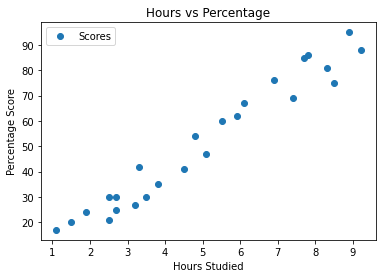

In [17]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

<AxesSubplot:>

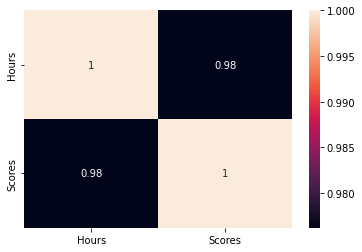

In [13]:
sns.heatmap(df.corr(),annot=True)

From above It is confirmed that the variables are positively correlated.

# Training Model

In [19]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [20]:
# Fitting the data
regression = LinearRegression()
regression.fit(train_X, train_y)

LinearRegression()

In [22]:
# Predicting the marks
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [23]:
# Predicting the actual marks
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [29]:
# Testing with the own data
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


In [30]:
# Calculating the accuracy
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486
